# Carga de datos

In [ ]:
import os

# URL del archivo en GitHub
url_archivo_github = 'https://raw.githubusercontent.com/SekDak12/Proyecto-Ciencia/main/2023%20QS.csv'

# Ruta donde se guardará el archivo descargado
ruta_guardado = '2023 QS.csv'

# Comando para descargar usando wget
comando_wget = f'wget {url_archivo_github} '

# Ejecutar el comando para descargar
os.system(comando_wget)

0

In [ ]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt

df = pd.read_csv ("2023 QS.csv")
df

df1 = pd.read_csv ("2023 QS.csv")


# Limpieza y verificacion de correlaciones

In [ ]:
df.dtypes

Rank               int64
institution       object
location code     object
location          object
ar score         float64
ar rank           object
er score         float64
er rank           object
fsr score        float64
fsr rank          object
cpf score        float64
cpf rank          object
ifr score        float64
ifr rank          object
isr score        float64
isr rank          object
irn score        float64
irn rank          object
ger score        float64
ger rank          object
score scaled      object
dtype: object

In [ ]:
###
###  Primer tipo de limpieza realizada el 11/09
###
column_names = df.columns
print(column_names)


#Las columnas que pertenecen a ranks y esta universidad cuente con un posicion mayor a 601 aparece como 601+
#Por lo cual reemplacaremos estos por un valor outlier

df['ar rank']  = df["ar rank"].replace(["501+"],[10000] )
df['er rank']  = df["er rank"].replace(["501+"],[10000] )
df['fsr rank'] = df["fsr rank"].replace(["501+"],[10000] )
df['cpf rank'] = df["cpf rank"].replace(["501+"],[10000] )
df['ifr rank'] = df["ifr rank"].replace(["501+"],[10000] )
df['isr rank'] = df["isr rank"].replace(["501+"],[10000] )
df['irn rank'] = df["irn rank"].replace(["501+"],[10000] )
df['ger rank'] = df["ger rank"].replace(["501+"],[10000] )

df['ar rank']  = df["ar rank"].replace(["601+"],[10000] )
df['er rank']  = df["er rank"].replace(["601+"],[10000] )
df['fsr rank'] = df["fsr rank"].replace(["601+"],[10000] )
df['cpf rank'] = df["cpf rank"].replace(["601+"],[10000] )
df['ifr rank'] = df["ifr rank"].replace(["601+"],[10000] )
df['isr rank'] = df["isr rank"].replace(["601+"],[10000] )
df['irn rank'] = df["irn rank"].replace(["601+"],[10000] )
df['ger rank'] = df["ger rank"].replace(["601+"],[10000] )

columnas_a_rellenar1 = ['ar rank', 'er rank', 'fsr rank', 'cpf rank', 'ifr rank', 'isr rank', 'irn rank', 'ger rank']


columnas_a_rellenar2 = ['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score',  'ger score']


#Estos se rellenan con valores atipicos fuera del rango, en este caso colocandose 1000000 a los ranks que originalmente son NaN
df[columnas_a_rellenar1] = df[columnas_a_rellenar1].fillna("1000000")
#Estos se rellenan con valores atipicos fuera del rango, en este caso colocandose 0 a los score que originalmente son NaN
df[columnas_a_rellenar2] = df[columnas_a_rellenar2].fillna("0")

df['ar rank'] = df['ar rank'].astype(int)
df['er rank'] = df['er rank'].astype(int)
df['fsr rank'] = df['fsr rank'].astype(int)
df['cpf rank'] = df['cpf rank'].astype(int)
df['ifr rank'] = df['ifr rank'].astype(int)
df['isr rank'] = df['isr rank'].astype(int)
df['irn rank'] = df['irn rank'].astype(int)
df['ger rank'] = df['ger rank'].astype(int)

df['ar score'] = df['ar score'].astype(float)
df['er score'] = df['er score'].astype(float)
df['fsr score'] = df['fsr score'].astype(float)
df['cpf score'] = df['cpf score'].astype(float)
df['ifr score'] = df['ifr score'].astype(float)
df['isr score'] = df['isr score'].astype(float)
df['irn score'] = df['irn score'].astype(float)
df['ger score'] = df['ger score'].astype(float)


Index(['Rank', 'institution', 'location code', 'location', 'ar score',
       'ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score',
       'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank',
       'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled'],
      dtype='object')


In [ ]:
df.describe()

,Rank,ar score,ar rank,er score,er rank,fsr score,fsr rank,cpf score,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,711.500000,20.124684,6571.889592,20.642616,6571.894515,29.954923,5907.383966,24.443108,5900.695499,29.477637,74135.174402,25.481294,45590.928270,49.116948,14958.016878,25.965823,14261.814346
std,410.640354,22.802706,4657.591711,24.025717,4657.584965,28.174827,4793.291008,27.899638,4794.211952,33.933455,252025.050821,30.715729,195157.596366,30.435110,94771.144298,26.199984,91094.827697
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,356.250000,5.400000,356.250000,4.400000,356.250000,8.200000,356.250000,3.000000,356.250000,3.700000,356.250000,2.900000,356.250000,21.200000,356.250000,6.525000,356.250000
50%,711.500000,10.800000,10000.000000,10.250000,10000.000000,18.200000,10000.000000,10.950000,10000.000000,11.300000,10000.000000,9.700000,10000.000000,46.800000,10000.000000,15.400000,10000.000000
75%,1066.750000,23.775000,10000.000000,26.950000,10000.000000,43.475000,10000.000000,39.200000,10000.000000,48.975000,10000.000000,38.625000,10000.000000,77.375000,10000.000000,36.300000,10000.000000
max,1422.000000,100.000000,10000.000000,100.000000,10000.000000,100.000000,10000.000000,100.000000,10000.000000,100.000000,1000000.000000,100.000000,1000000.000000,100.000000,1000000.000000,100.000000,1000000.000000


# Limpieza nueva

In [ ]:
##
## Nueva Limpieza
##

df1= df.drop("ar rank", axis=1)
df2= df1.drop("er rank", axis=1)
df3= df2.drop("fsr rank", axis=1)
df4= df3.drop("cpf rank", axis=1)
df5= df4.drop("ifr rank", axis=1)
df6= df5.drop("irn rank", axis=1)
df7= df6.drop("isr rank", axis=1)
dfclean= df7.drop("ger rank", axis=1)


dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0,100
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0,98.8
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0,98.4
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.7,NaN,8.1,NaN,-
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.3,1.3,8.8,30.9,-
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.2,2.8,51.1,NaN,-
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,NaN,NaN,7.5,8.7,-


In [ ]:
valor_a_contar = "-"
conteo = (df['score scaled'] == valor_a_contar).sum()
print(conteo)



922


In [ ]:
#Vamos a tratar de eliminar un inconveniente con el dato df['score scaled'] = df['score scaled'].astype(float) ya que, este dato oriinalmente
#Se trata de un sting con elements - que seran reemplados y el dominio del resto de datos es de  24.2 a 100, estos se reemplazaran con 0

dfclean['score scaled'] = dfclean["score scaled"].replace(["-"],[0] )
dfclean['score scaled'] = dfclean['score scaled'].astype(float)

##
## Se arreglo dicho error creando un modelo de regresion en las secciones adelante
##

In [ ]:
dfclean.isnull().sum()

Rank              0
institution       0
location code     0
location          0
ar score          0
er score          1
fsr score         2
cpf score         5
ifr score        98
isr score        57
irn score        13
ger score        12
score scaled      0
dtype: int64

In [ ]:
#Los NaN en er score, fsr score, cpf score al contar con una menor cantidad de NaNs se reemplazaran como 0.

dfclean['er score'].fillna(0, inplace=True)
dfclean['fsr score'].fillna(0, inplace=True)
dfclean['cpf score'].fillna(0, inplace=True)

#Los Nan con respecto a ifr, isr, irn seran transformados por las media de sus datos, ya que estos se encuentran
#Relacionados con la falta de informacion de la colaboraciones internacionales de las universidades

media_ifr = dfclean['ifr score'].mean()
dfclean['ifr score'].fillna(media_ifr, inplace=True)

media_isr = dfclean['isr score'].mean()
dfclean['isr score'].fillna(media_isr, inplace=True)

media_irn = dfclean['irn score'].mean()
dfclean['irn score'].fillna(media_irn, inplace=True)

media_ger = dfclean['ger score'].mean()
dfclean['ger score'].fillna(media_ger, inplace=True)

In [ ]:
dfclean.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,711.500000,20.124684,20.642616,29.954923,24.443108,31.659517,26.545348,49.570121,26.186809,15.688959
std,410.640354,22.802706,24.025717,28.174827,27.899638,32.971465,30.270835,30.066955,26.090171,24.008663
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,356.250000,5.400000,4.400000,8.200000,3.000000,5.200000,3.400000,21.900000,6.800000,0.000000
50%,711.500000,10.800000,10.250000,18.200000,10.950000,16.650000,12.350000,48.900000,15.700000,0.000000
75%,1066.750000,23.775000,26.950000,43.475000,39.200000,48.975000,38.625000,77.375000,36.300000,30.700000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Seccion de graficacion

In [ ]:
variables_a_incluir = [col for col in df.columns if 'rank' not in col and col not in ('Rank', 'institution', 'location code', 'location')]
variables_a_incluir

['ar score',
 'er score',
 'fsr score',
 'cpf score',
 'ifr score',
 'isr score',
 'irn score',
 'ger score',
 'score scaled']

<ipython-input-12-2d752970c03b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dfclean.corr()


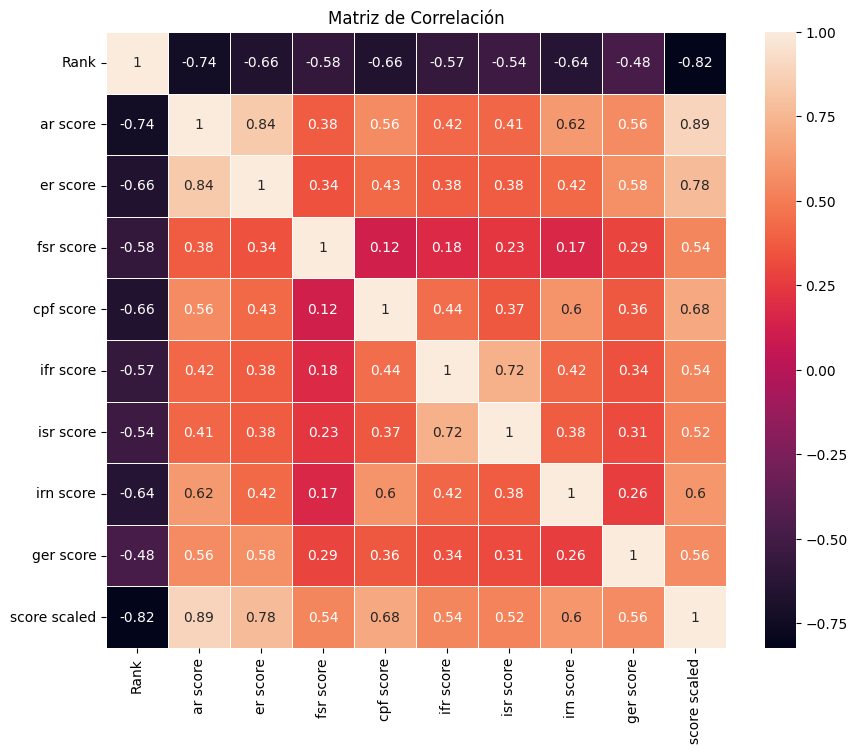

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = dfclean.corr()

# Visualiza la  matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

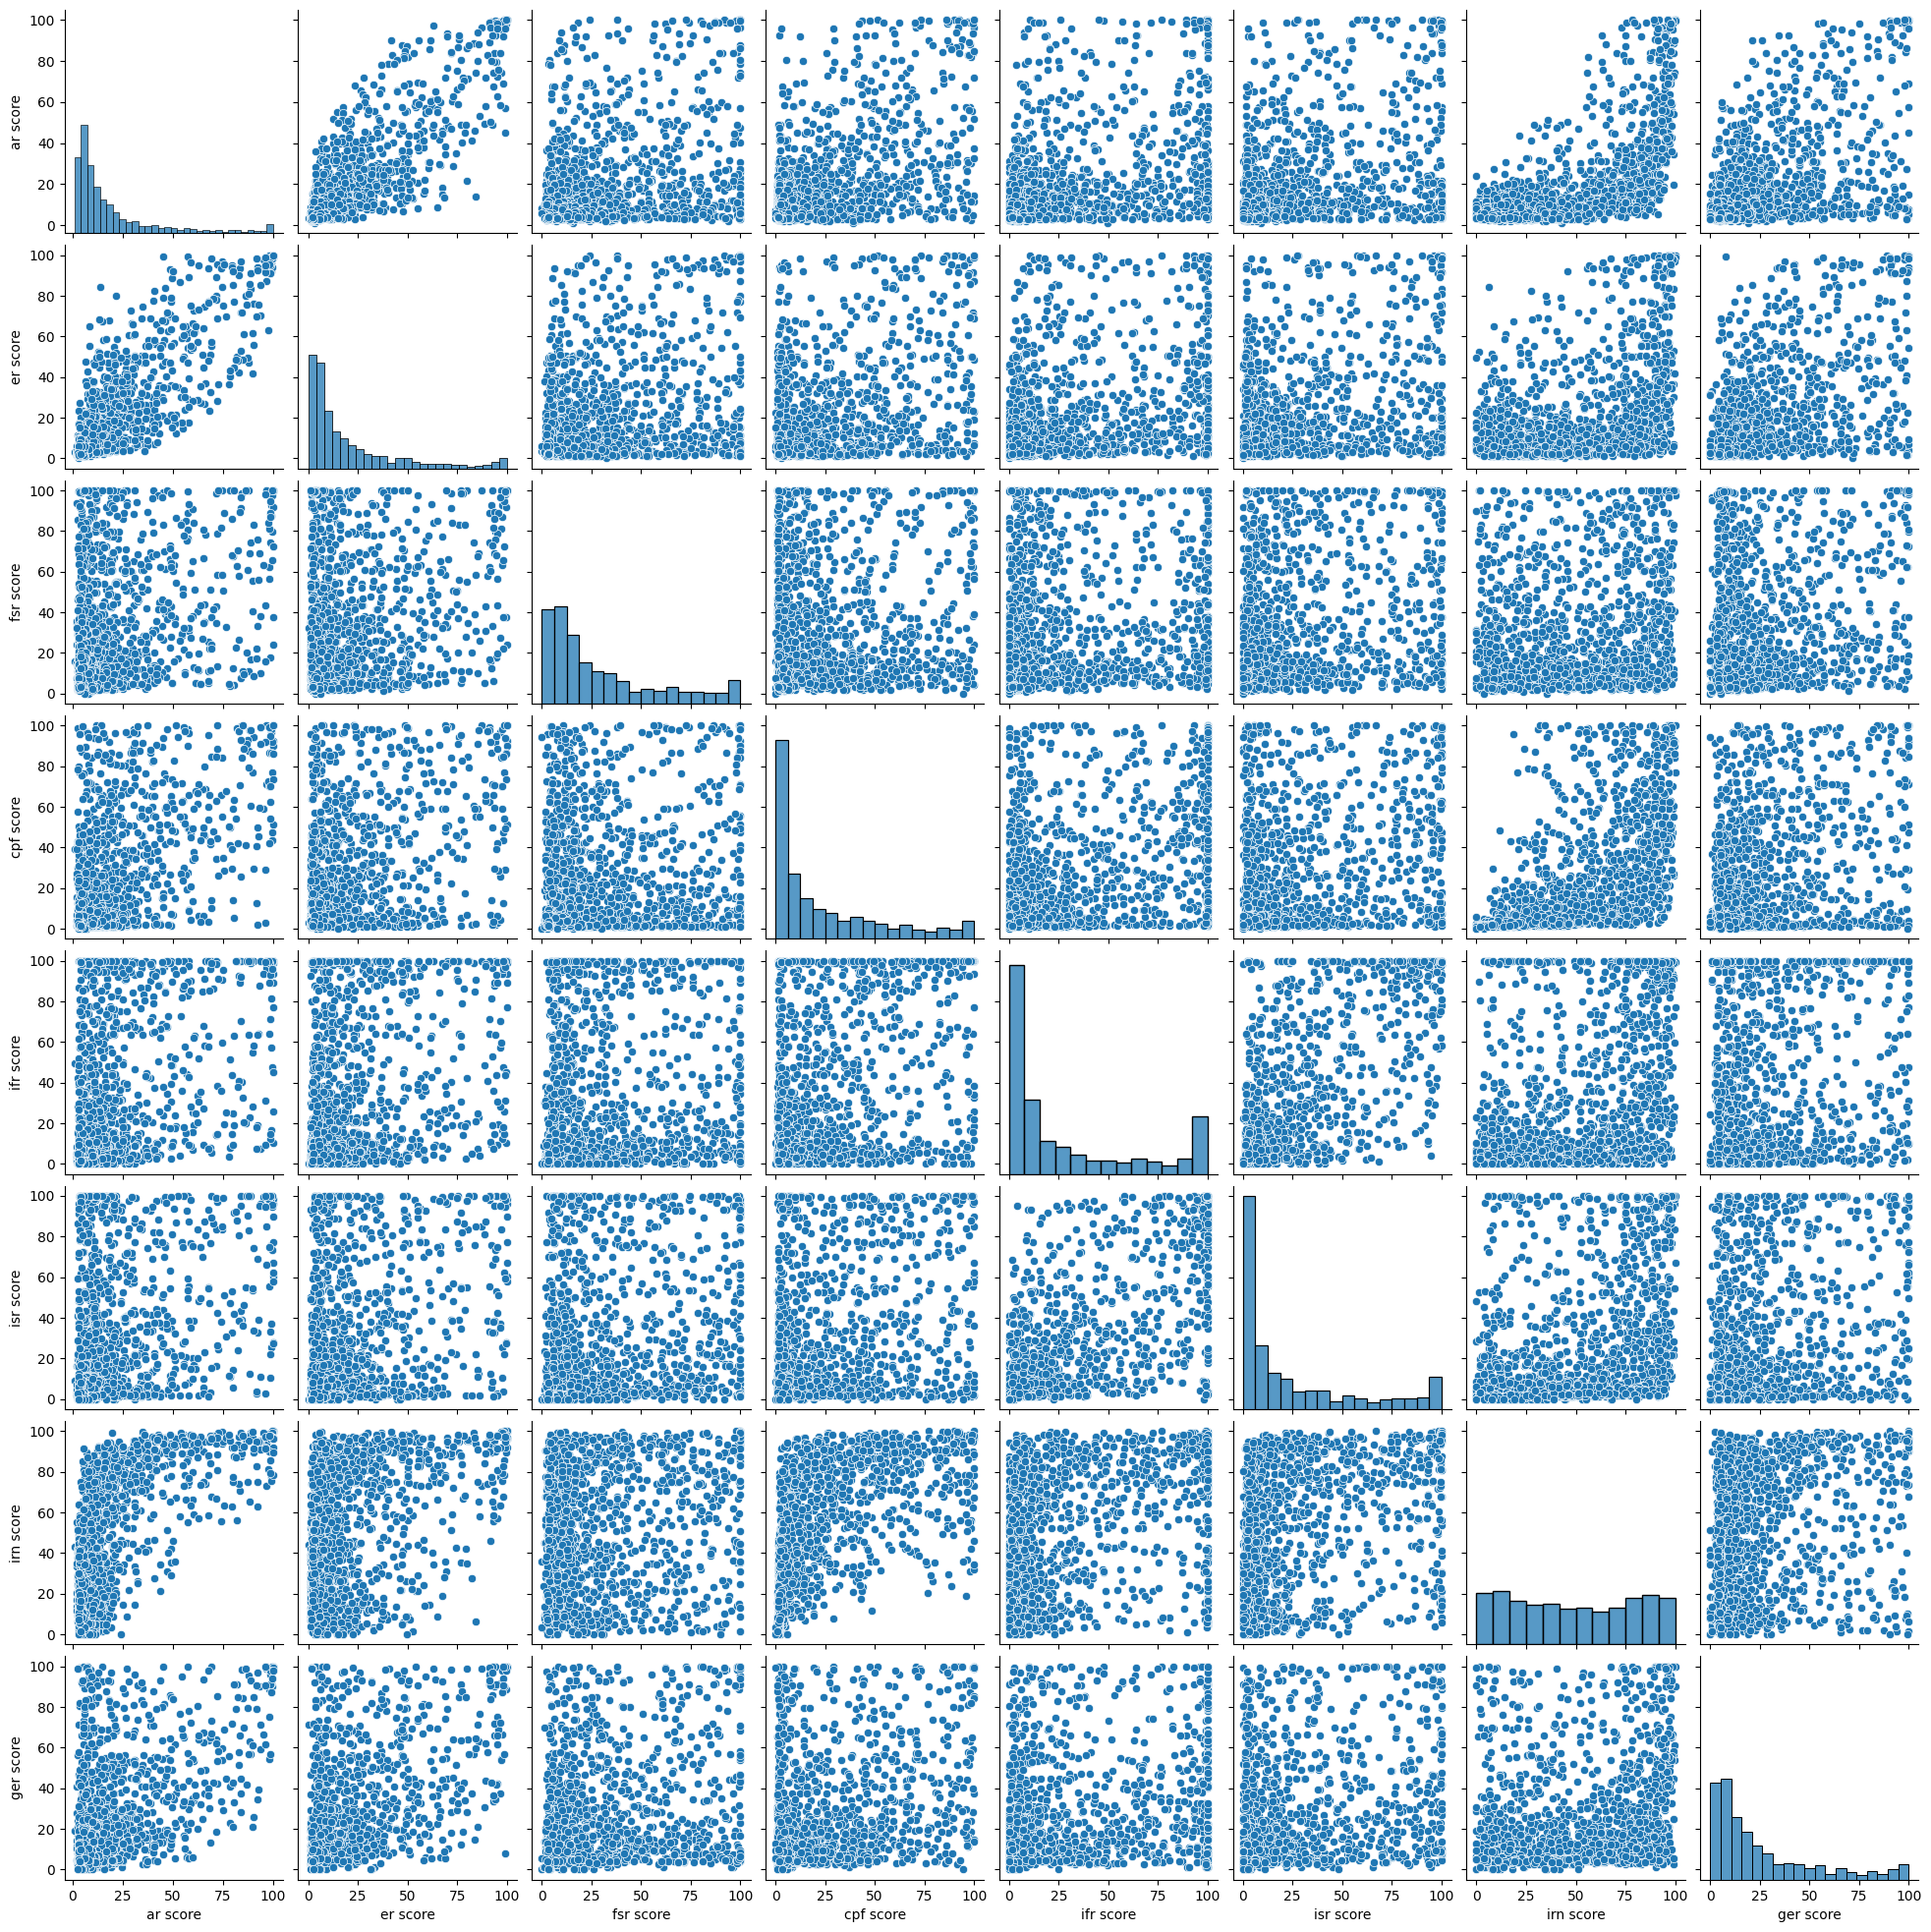

In [ ]:
sns.pairplot(dfclean, vars = ['ar score', 'er score','fsr score','cpf score','ifr score','isr score','irn score','ger score' ], kind= "scatter" )

# Creador de modelo de regresion logistica para solucion de problemas con
# el Score Scaled

In [ ]:
dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,100.0
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,98.8
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,98.4
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,0.0
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,0.0
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,0.0
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,0.0


In [ ]:
# Separar la variable objetivo 'Rank'
y =dfclean['score scaled']
# Seleccionar todas las columnas excepto 'Rank' como características
##X = df[['ar score','ar rank', 'er score', 'er rank', 'fsr score', 'fsr rank', 'cpf score', 'cpf rank', 'ifr score', 'ifr rank', 'isr score', 'isr rank', 'irn score', 'irn rank', 'ger score', 'ger rank', 'score scaled']]
X2 = dfclean.drop('institution', axis=1)

X3 = X2.drop('location', axis=1)
X4 = X3.drop('location code', axis=1)
#X5 = X4.drop('label', axis=1)
#X6 = X5.drop('clasificacion', axis=1)

X = X4.drop('Rank', axis=1)
#X = X.drop('score scaled 2.0', axis=1)
X = X.drop("score scaled", axis=1)
X.shape, y.shape
X




,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000
1,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000
2,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000
3,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000
4,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000
...,...,...,...,...,...,...,...,...
1417,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809
1418,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000
1419,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809
1420,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(max_depth=12, random_state=0)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba y guardar las predicciones
y_pred_rf = rf_model.predict(X)

# Evaluar el modelo de Random Forest en el conjunto de prueba y obtener la puntuación
score_rf = rf_model.score(X_test, y_test)

# Imprimir las puntuaciones
print("Puntuación del modelo de Random Forest en el conjunto de prueba:", score_rf)

# Agregar las predicciones como nuevas columnas en el DataFrame
dfclean['score scaled 2.0'] = y_pred_rf


Puntuación del modelo de Random Forest en el conjunto de prueba: 0.9433323559869756


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Definir una cuadrícula de hiperparámetros para buscar
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 12, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=0)

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)

# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los datos de entrenamiento
best_rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X)

# Evaluar el modelo
score_rf = best_rf_model.score(X_test, y_test)


# Imprimir las puntuaciones
print("Puntuación del modelo de Random Forest en el conjunto de prueba:", score_rf)

# Agregar las predicciones como nuevas columnas en el DataFrame
dfclean['score scaled 2.0'] = y_pred_rf


In [ ]:
#dfclean = dfclean.drop("score_scaled_prediction_gb", axis=1)
#dfclean = dfclean.drop("clasificacion", axis=1)
#dfclean = dfclean.drop("label", axis=1)

dfclean

,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled,score scaled 2.0
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.000000,90.000000,96.1,100.000000,100.0,99.031
1,2,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.3,100.000000,96.300000,99.5,100.000000,98.8,98.304
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.800000,60.300000,96.3,100.000000,98.5,98.043
3,4,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,90.0,98.800000,98.400000,99.9,100.000000,98.4,97.762
4,5,Harvard University,US,United States,100.0,100.0,99.4,100.0,76.900000,66.900000,100.0,100.000000,97.6,95.849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,1418,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,4.6,5.8,3.6,1.0,1.700000,26.545348,8.1,26.186809,0.0,0.000
1418,1419,Universidad Tecnológica de Bolívar,CO,Colombia,3.0,5.8,2.4,2.2,9.300000,1.300000,8.8,30.900000,0.0,0.000
1419,1420,Université Mohammed V de Rabat,MA,Morocco,2.8,2.6,3.2,3.6,5.200000,2.800000,51.1,26.186809,0.0,0.000
1420,1421,University of Craiova,RO,Romania,3.3,1.8,2.7,2.0,31.659517,26.545348,7.5,8.700000,0.0,0.000


In [ ]:
dfclean.isnull().sum()

# Analisis de Maquinas de vectores de soporte

In [ ]:
dfclean1 = dfclean.drop("score scaled", axis =1 )

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar los datos y realizar preprocesamiento básico si es necesario
# Suponiendo que tienes un DataFrame df con tus datos
# ...

# Definir intervalos y etiquetas
intervalos = [0, 20, 50, 80, 100]  # Define tus intervalos según tus criterios
etiquetas = ['malo', 'regular', 'bueno', 'excelente']  # Define las etiquetas para cada intervalo

# Crear la variable objetivo basada en los intervalos
dfclean1['clasificacion'] = pd.cut(dfclean1['score scaled 2.0'], bins=intervalos, labels=etiquetas)

# Codificar la variable objetivo ('clasificacion')
le = LabelEncoder()
dfclean1['label'] = le.fit_transform(dfclean1['clasificacion'])

# Definir las características y la variable objetivo
X = dfclean1[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score', 'ger score']]
y = dfclean1['label']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo SVM
svm = SVC(kernel='linear')  # Puedes elegir el kernel adecuado según tu problema
svm.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Otras métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión: 0.9789473684210527
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         0
           3       0.99      0.99      0.99        75
           4       0.99      0.99      0.99       183

    accuracy                           0.98       285
   macro avg       0.72      0.74      0.73       285
weighted avg       0.98      0.98      0.98       285

Matriz de confusión:
[[ 20   2   0   0   0]
 [  1   4   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0  74   1]
 [  0   0   1   1 181]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Analisis Respecto a Mexico

In [ ]:
mx = dfclean[dfclean['location'] == 'Mexico']
mx


,Rank,institution,location code,location,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score,score scaled,score scaled 2.0
104,105,Universidad Nacional Autónoma de México (UNAM),MX,Mexico,96.0,95.1,43.2,2.9,9.300000,2.600000,91.3,61.5,58.0,62.399000
169,170,Tecnológico de Monterrey,MX,Mexico,48.8,92.8,72.9,2.2,52.900000,8.600000,65.1,85.6,47.1,46.210250
401,402,Colegio de México,MX,Mexico,14.9,3.9,100.0,1.5,10.100000,19.800000,1.7,99.6,28.3,28.134833
546,547,Universidad Panamericana (UP),MX,Mexico,7.6,29.3,78.2,1.2,12.200000,1.400000,10.8,10.4,0.0,4.319733
636,637,Universidad Anáhuac México,MX,Mexico,11.8,33.1,55.3,1.1,6.500000,3.500000,2.4,36.1,0.0,0.985000
730,731,Universidad Iberoamericana IBERO,MX,Mexico,17.5,39.9,29.3,1.3,6.600000,2.600000,7.1,50.0,0.0,0.277000
764,765,Instituto Politécnico Nacional (IPN),MX,Mexico,20.0,50.9,9.2,2.8,2.900000,1.200000,60.9,9.5,0.0,0.246000
765,766,Instituto Tecnológico Autónomo de México (ITAM),MX,Mexico,14.2,47.4,11.9,2.0,64.100000,1.700000,5.1,68.7,0.0,0.000000
784,785,Universidad Autónoma Chapingo,MX,Mexico,3.5,2.5,66.4,1.4,3.100000,1.400000,2.8,7.3,0.0,0.000000
845,846,"ITESO, Universidad Jesuita de Guadalajara",MX,Mexico,5.7,7.7,44.1,1.0,2.800000,1.600000,2.1,8.5,0.0,0.000000


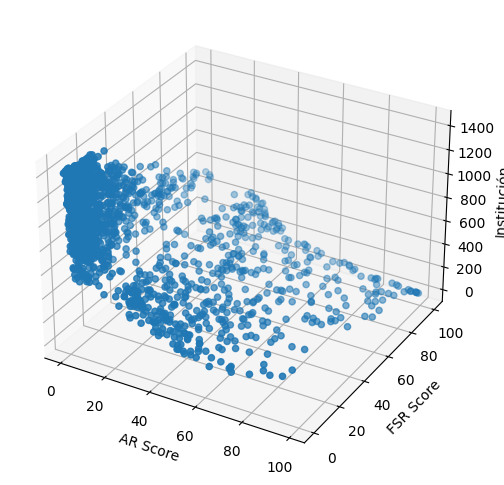

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Obtener los datos de AR Score, FSR Score e Instituciones
ar_scores = dfclean['score scaled 2.0']
fsr_scores = dfclean['fsr score']
instituciones = dfclean['institution']

# Crear una figura 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Agregar los puntos en el gráfico 3D
ax.scatter(ar_scores, fsr_scores, range(len(instituciones)))

# Etiquetar los ejes
ax.set_xlabel('AR Score')
ax.set_ylabel('FSR Score')
ax.set_zlabel('Institución')

# Mostrar el gráfico
plt.show()

[Text(0, 0, '96'),
 Text(0, 0, '48.8'),
 Text(0, 0, '14.9'),
 Text(0, 0, '7.6'),
 Text(0, 0, '11.8'),
 Text(0, 0, '17.5'),
 Text(0, 0, '20'),
 Text(0, 0, '14.2'),
 Text(0, 0, '3.5'),
 Text(0, 0, '5.7'),
 Text(0, 0, '3.8'),
 Text(0, 0, '21.7'),
 Text(0, 0, '23'),
 Text(0, 0, '20.3'),
 Text(0, 0, '7.5'),
 Text(0, 0, '14.9'),
 Text(0, 0, '3.2'),
 Text(0, 0, '15.2'),
 Text(0, 0, '11.5'),
 Text(0, 0, '7.6'),
 Text(0, 0, '4.4'),
 Text(0, 0, '6.2'),
 Text(0, 0, '4.7'),
 Text(0, 0, '3.6'),
 Text(0, 0, '7.7'),
 Text(0, 0, '4.1'),
 Text(0, 0, '2.9'),
 Text(0, 0, '3.3'),
 Text(0, 0, '4.4'),
 Text(0, 0, '8.7'),
 Text(0, 0, '5.8'),
 Text(0, 0, '3.4')]

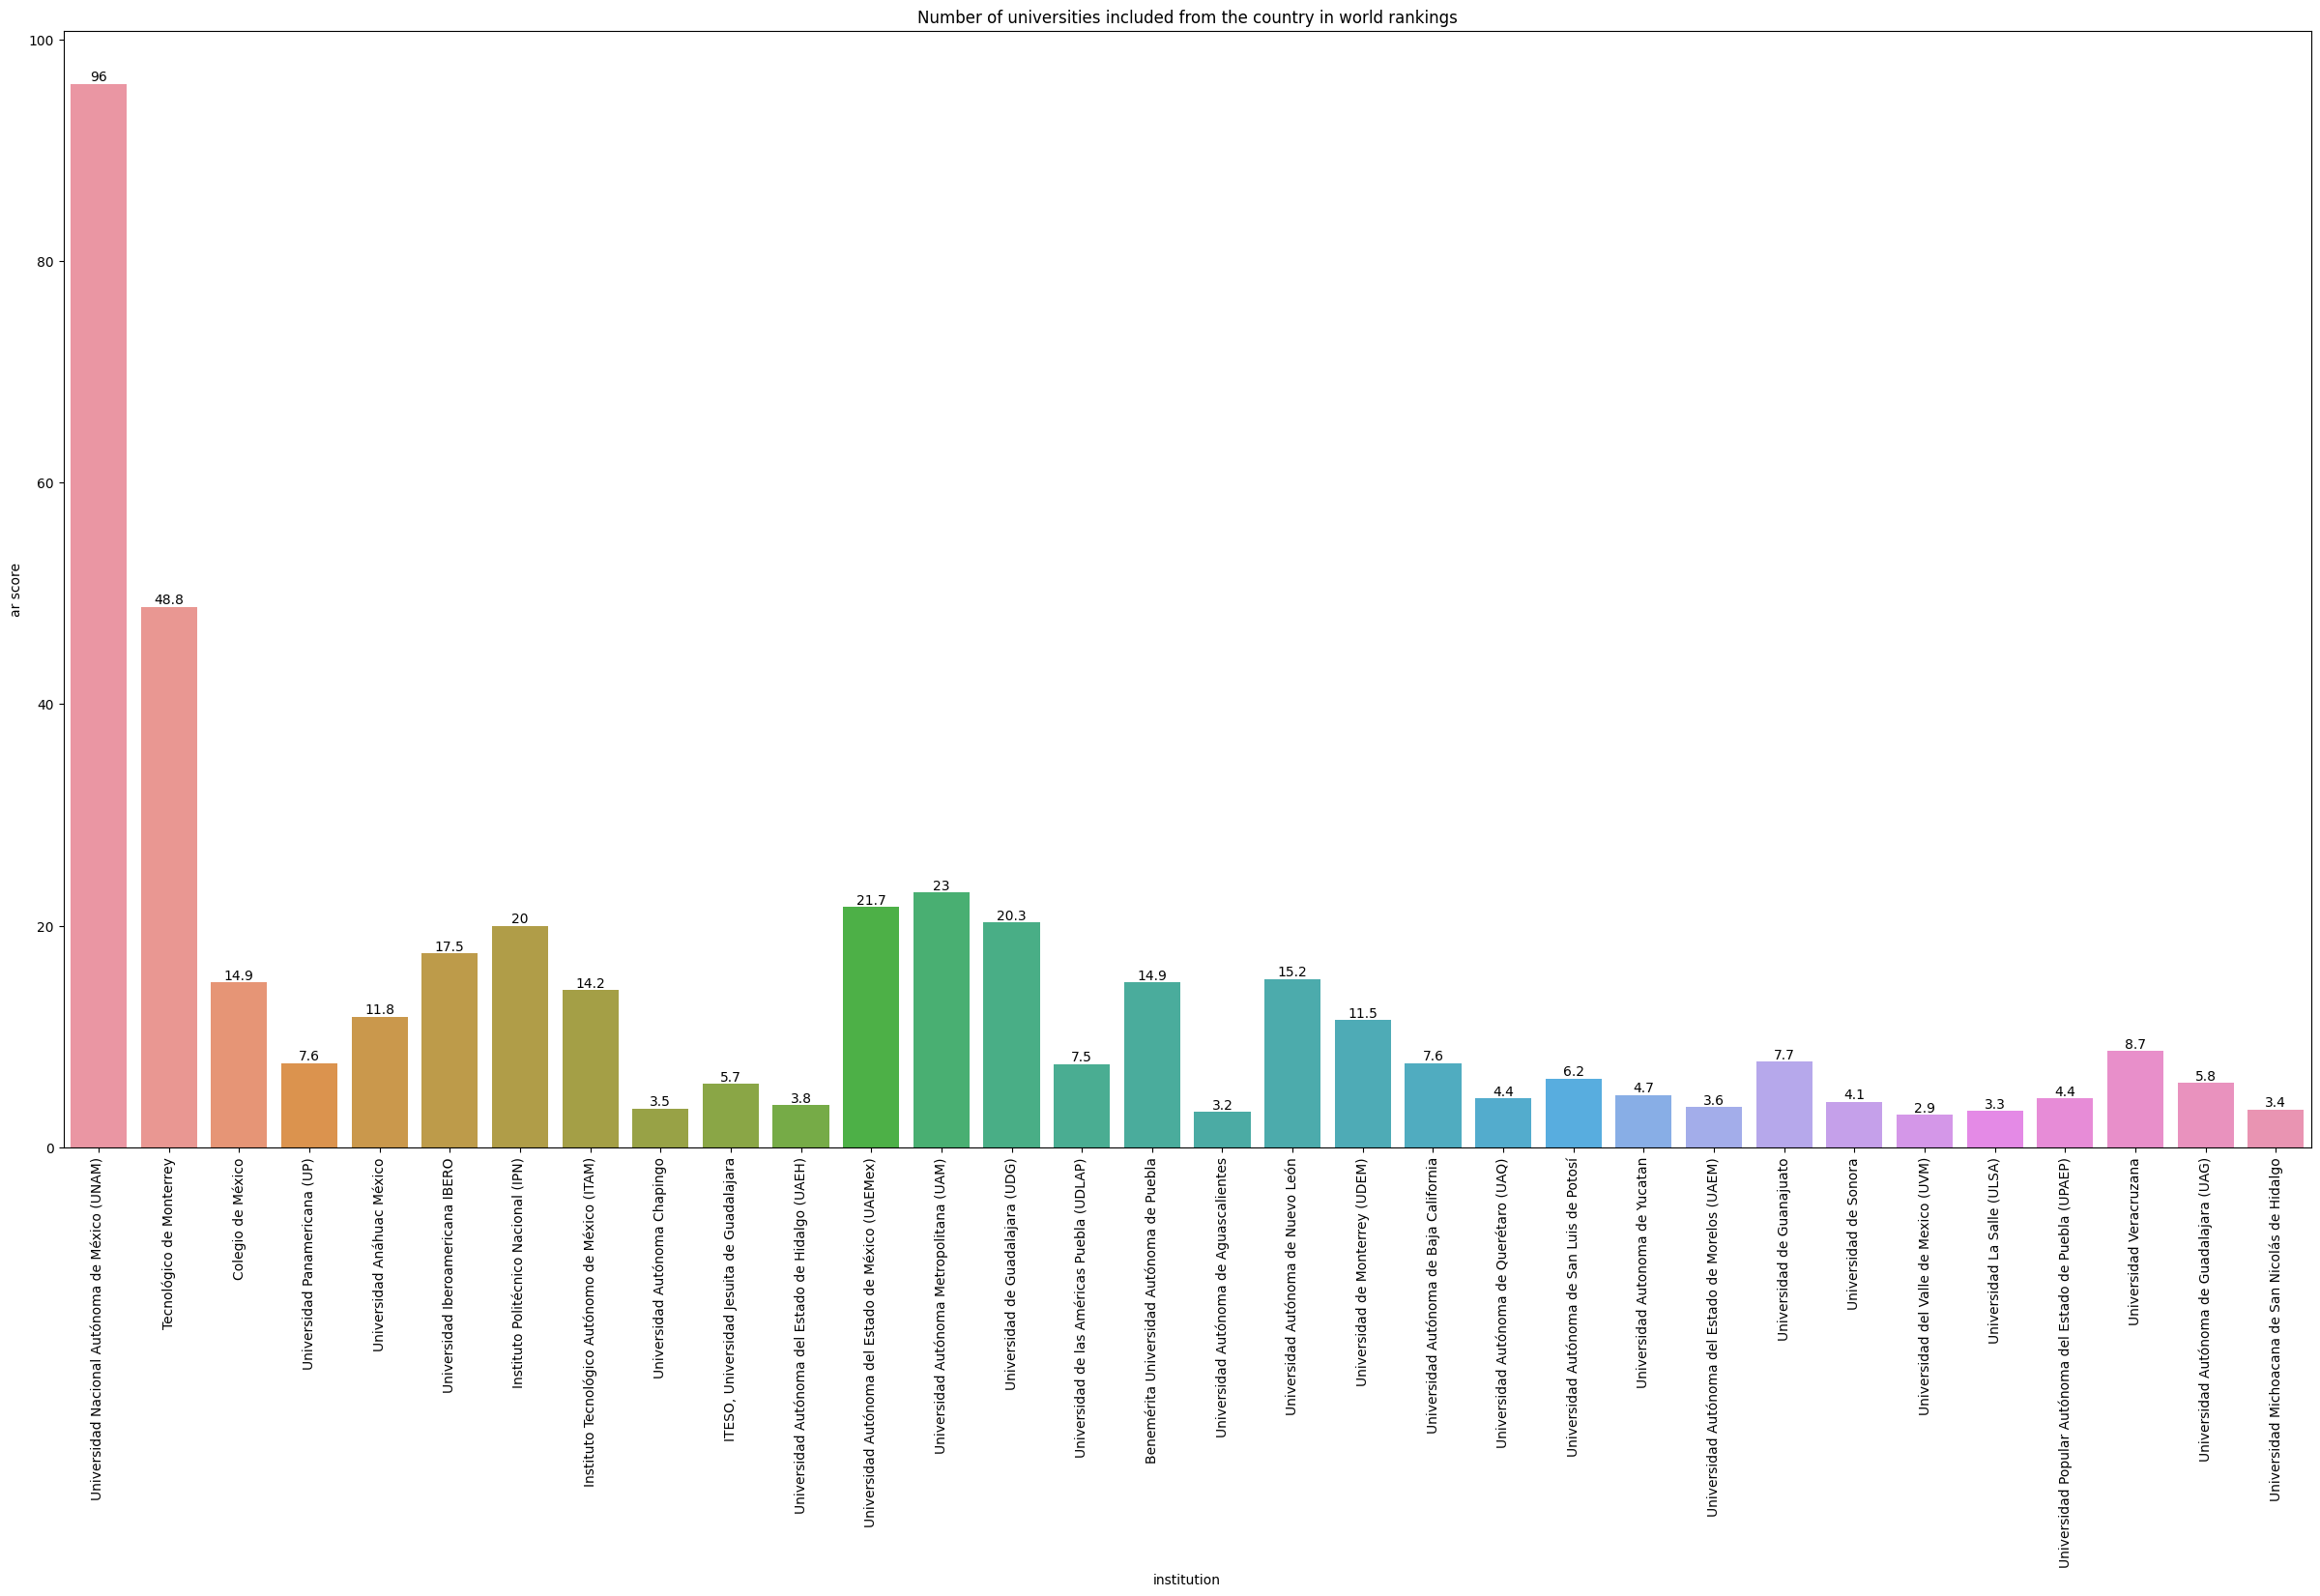

In [ ]:


plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.title('Number of universities included from the country in world rankings')
ax = sns.barplot(x='institution', y='ar score',data=mx)
ax.bar_label(ax.containers[0])

